# **California Housing Prices**

## **Business Problem Understanding**

### **Context**

California adalah salah satu negara bagian di Amerika Serikat dengan populasi yang padat dan pasar properti yang sangat kompetitif. Harga rumah dipengaruhi oleh berbagai faktor seperti pendapatan median, lokasi geografis, dan fasilitas lingkungan. Dengan banyaknya permintaan akan properti, memahami faktor-faktor yang memengaruhi harga rumah menjadi penting bagi pengembang properti, investor, dan pemerintah. Maka dari itu, untuk meninjau lebih lanjut mengenai faktor yang mempengaruhi nilai rumah, maka kita akan menggunakan dataset California Housing Price.

Dataset California Housing Price adalah dataset yang berisi informasi mengenai median harga rumah per-blok/area di California dari Sensus tahun 1990 sebagaimana yang dilansir pada paper berjudul [Sparse spatial autoregressions](https://www.sciencedirect.com/science/article/abs/pii/S016771529600140X). Dataset ini mencakup berbagai variabel yang mempengaruhi harga rumah, seperti longitude, latitude, median house age, total rooms, total bedrooms, population, households, median income, median house value, dan ocean proximity.

### **Problem Statement**

Di pasar properti yang kompetitif, menentukan harga jual rumah yang tepat adalah tantangan yang signifikan. **Penjual rumah membutuhkan alat yang dapat memberikan estimasi harga berdasarkan berbagai fitur properti, sehingga mereka dapat menetapkan harga yang kompetitif dan menarik bagi pembeli**. Kurangnya panduan yang tepat dapat menyebabkan harga yang terlalu tinggi atau terlalu rendah, yang berakibat pada penjualan yang lambat atau kehilangan potensi keuntungan.

### **Goals**

Tujuan utama dari analisis ini adalah: **untuk membangun alat prediksi harga rumah yang dapat membantu penjual dalam menentukan harga jual yang kompetitif**. Adapun tujuan yang lebih terperinci yaitu:
1.	Menghasilkan model prediksi yang dapat mengestimasi harga rumah berdasarkan fitur-fitur seperti pendapatan median, usia rumah, dan lokasi geografis.
2.	Memberikan wawasan tentang faktor mana yang paling memengaruhi harga rumah.
3.	Membantu para pemangku kepentingan (pembeli rumah, pemilik rumah, developer perusahaan real estate, dan investor properti) dalam membuat keputusan yang lebih baik berdasarkan estimasi nilai pasar rumah.


### **Analytic Approach**

Pendekatan analitik melibatkan menganalisis data untuk menemukan pola-pola dalam fitur yang ada, serta membangun **model regresi** yang dapat memprediksi harga rumah berdasarkan variabel-variabel yang tersedia. Sebelum analisis lebih lanjut, data perlu dibersihkan dan diproses untuk memastikan kualitas dan konsistensi. Setelah itu, model prediktif dapat digunakan untuk membantu perusahaan real estate dalam menyediakan alat prediksi harga jual properti yang baru masuk dalam daftar.
Berikut ini merupakan langkah-langkah analitik yang akan diambil:
1.	Eksplorasi data untuk memahami pola dan distribusi nilai dari setiap fitur.
2.	Pra-pemrosesan data, termasuk menangani nilai yang hilang, standarisasi fitur, dan encoding data kategorikal.
3.	Pemodelan prediktif dengan mencoba pemodelan dengan algoritma seperti:
	- Regresi Linear (sebagai baseline).
	- Model non-linear seperti Decision Tree, KNNeighborhood, Random Forest dan Gradient Boosting.
4.  Evaluasi performa model menggunakan dataset yang telah dibagi menjadi data pelatihan dan pengujian.
5.  Menentukan model dengan performa terbaik yang selanjutnya akan dilakukan tuning hyperparameter untuk meningkatkan performa.

### **Metric Evaluation**

Keberhasilan model akan dievaluasi menggunakan metrik berikut:
- Root Mean Squared Error (RMSE): Memberikan penalti lebih besar untuk kesalahan prediksi yang lebih besar.
- Mean Absolute Error (MAE): Rata-rata kesalahan absolut antara nilai prediksi dan nilai aktual.
- Mean Absolute Percentage Error (MAPE): Rata-rata persentase error yang dihasilkan oleh model regresi.
- R² Score: Mengukur seberapa baik model menjelaskan variasi pada data target.

Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan.

Selain itu, kita juga bisa menggunakan nilai R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.


## **Data Understanding**

- Dataset berisi informasi mengenai median harga rumah untuk distrik-distrik di California yang berasal dari sensus tahun 1990. Informasi data-datanya:

### **Attributes Information**

| **Attribute**           | **Data Type** | **Description**                                                                 |
|-------------------------|---------------|---------------------------------------------------------------------------------|
| longitude               | Float         | Ukuran sejauh mana suatu rumah berada ke barat; nilai yang lebih tinggi berarti lebih ke barat. |
| latitude                | Float         | Ukuran sejauh mana suatu rumah berada ke utara; nilai yang lebih tinggi berarti lebih ke utara. |
| housing_median_age      | Integer       | Usia median rumah dalam suatu blok; angka yang lebih rendah menunjukkan bangunan yang lebih baru. |
| total_rooms             | Integer       | Total jumlah ruangan dalam suatu blok.                                          |
| total_bedrooms          | Integer       | Total jumlah kamar tidur dalam suatu blok.                                      |
| population              | Integer       | Total jumlah penduduk tinggal dalam suatu blok.                                 |
| households              | Integer       | Total jumlah rumah tangga, kelompok orang yang tinggal dalam suatu unit rumah, dalam suatu blok. |
| median_income           | Float         | Pendapatan median untuk rumah tangga dalam suatu blok rumah (diukur dalam puluhan ribu Dolar AS). |
| median_house_value      | Float         | Nilai rumah median untuk rumah tangga dalam suatu blok (diukur dalam Dolar AS).  |
| ocean_proximity         | Object        | Lokasi rumah terkait dengan samudera/laut.                                      |

<br>

In [2]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load dataset
df = pd.read_csv("C:\\Users\\mhdch\\OneDrive\\Documents\\Capstone 3\\California Housing Price Dataset\\data_california_house (1).csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


- Dapat dilihat terdapat missing value pada total_bedrooms. Mari kita analisis lebih lanjut

### **Exploratory Data Analysis (EDA)**

#### **Distribution of California Median House Value**

<Figure size 600x400 with 0 Axes>

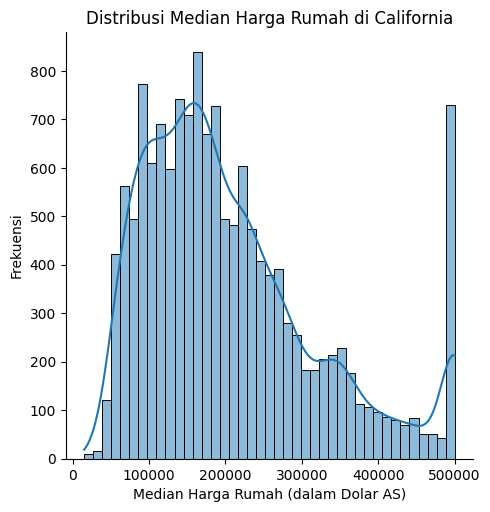

In [5]:
# Membuat histogram distribusi Median harga rumah
plt.figure(figsize=(6, 4))
sns.displot(df['median_house_value'], kde=True)
plt.title('Distribusi Median Harga Rumah di California')
plt.xlabel('Median Harga Rumah (dalam Dolar AS)')
plt.ylabel('Frekuensi')
plt.show()


- Berdasarkan plot distribusi Median harga rumah di atas, terlihat bahwa terdapat 'right-skewed distribution'. Dengan kata lain, terdapat skewness positif pada fitur Nilai Rumah Median. Ini menunjukkan bahwa sebagian besar rumah mempunyai nilai rata-rata atau sedikit di atas rata-rata, tetapi ada beberapa rumah dengan nilai sangat tinggi yang menggeser distribusi ke kanan. Nantinya akan kita lakukan treatment agar distribusinya cenderung normal.

#### **Distribusi Median House Value Berdasarkan Longitude dan Latitude**

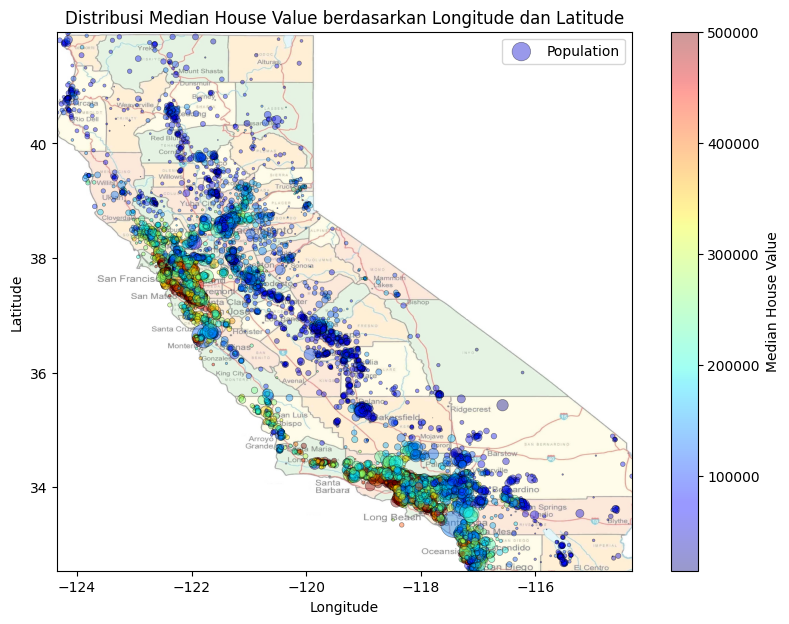

In [6]:
import matplotlib.image as mpimg

fig, ax = plt.subplots(figsize=(10, 7))

# Scatter plot untuk sebaran data harga rumah dengan skema warna jet
scatter = ax.scatter(df['longitude'], df['latitude'], alpha=0.4, s=df['population']/100,
                     c=df['median_house_value'], cmap=plt.get_cmap('jet'), edgecolor='k', linewidth=0.5)

# Memuat gambar peta California
california_img = mpimg.imread('california.png')

# Menentukan batas gambar (extent) sesuai dengan koordinat longitude dan latitude
img_extent = [-124.8, -113.7, 32.11, 42.05]

# Menampilkan gambar peta dengan scatter plot
ax.imshow(california_img, extent=img_extent, alpha=0.5, zorder=0)

# Menentukan batas x dan y sesuai dengan data longitude dan latitude
ax.set_xlim([df['longitude'].min(), df['longitude'].max()])
ax.set_ylim([df['latitude'].min(), df['latitude'].max()])

# Memberikan label dan judul
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Distribusi Median House Value berdasarkan Longitude dan Latitude')

# Menambahkan colorbar untuk menunjukkan skala harga rumah
colorbar = plt.colorbar(scatter, ax=ax, label='Median House Value')

# Menambahkan legenda untuk populasi
plt.legend(["Population"], loc="best")

# Menampilkan plot
plt.show()

- Sebaran nilai median rumah mencakup seluruh wilayah California. Sebagian besar titik data berkumpul di sepanjang garis pantai dan daerah metropolitan utama seperti Los Angeles dan San Francisco Bay Area. Median harga rumah yang lebih mahal berada dekat pesisir pantai. Daerah pedalaman dan lebih jauh dari garis pantai cenderung memiliki nilai median rumah yang lebih rendah dan populasi yang lebih sedikit, seperti yang terlihat pada titik-titik kecil dan berwarna biru di bagian tengah dan timur peta.

#### **Distribusi Median House Value Berdasarkan Ocean Proximity**

Informasi tambahan tentang lokasi geografis (Ocean Proximity) suatu distrik yang dapat mempengaruhi harga rumah :
1. <1H OCEAN (Kurang dari 1 Jam ke Samudera/Ocean): Ini mengindikasikan distrik yang berada dalam jarak kurang dari satu jam perjalanan ke samudera atau lautan.
2. INLAND (Pedalaman): Distrik-distrik ini terletak di pedalaman, jauh dari wilayah pesisir atau laut.
3. NEAR OCEAN (Dekat Samudera/Ocean): Menunjukkan distrik yang berdekatan dengan samudera atau lautan.
4. NEAR BAY (Dekat Teluk): Distrik yang dekat dengan teluk atau daerah air yang terhubung dengan laut, namun tidak langsung terhubung ke samudera.
5. ISLAND (Pulau): Ini mungkin merujuk pada distrik yang berada di pulau.

In [7]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: count, dtype: int64

- Dari data di atas terlihat rumah yang terdapat di pulau hanya 2. sedangkan sisanya banyak yang berlokasi dekat dengan laut. ini menunjukkan fitur Island nantinya tidak akan mewakili data karena data nya yang sedikit.

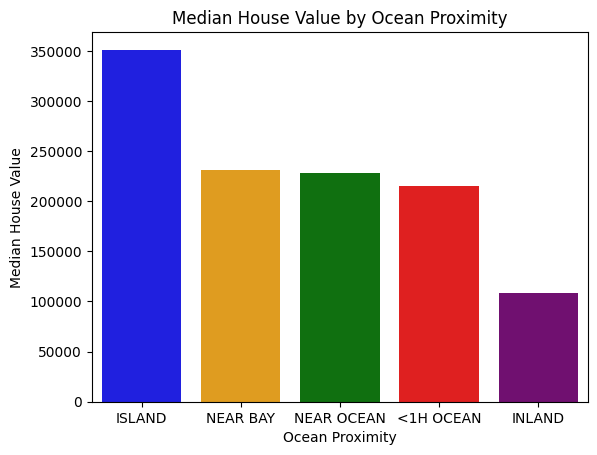

In [8]:
# Mengelompokkan dan menghitung median harga rumah berdasarkan kedekatan dengan laut
median_by_ocean_proximity = df.groupby('ocean_proximity')['median_house_value'].median().reset_index()
# Mengurutkan berdasarkan median harga rumah secara menurun
median_by_ocean_proximity_sorted = median_by_ocean_proximity.sort_values(by='median_house_value', ascending=False)
# Membuat palette warna sesuai dengan urutan yang diinginkan
palette_colors = {
    'ISLAND': 'blue',
    'NEAR BAY': 'orange',
    'NEAR OCEAN': 'green',
    '<1H OCEAN': 'red',
    'INLAND': 'purple'
}
# Membuat bar plot dengan warna yang disesuaikan
sns.barplot(x='ocean_proximity', y='median_house_value', data=median_by_ocean_proximity_sorted, palette=palette_colors)
# Menambahkan label dan judul
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.title('Median House Value by Ocean Proximity')
# Menampilkan plot
plt.show()

- Dari barplot hubungan median house value dengan ocean proximity di atas, dapat disimpulkan bahwa rumah yang berada di pulau merupakan rumah yang paling mahal, semakin dekat dengan laut maka semakin mahal. Semakin Rumah terletak di pedalaman maka semakin murah harganya.

#### **Deskripsi statistik dataset**

In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


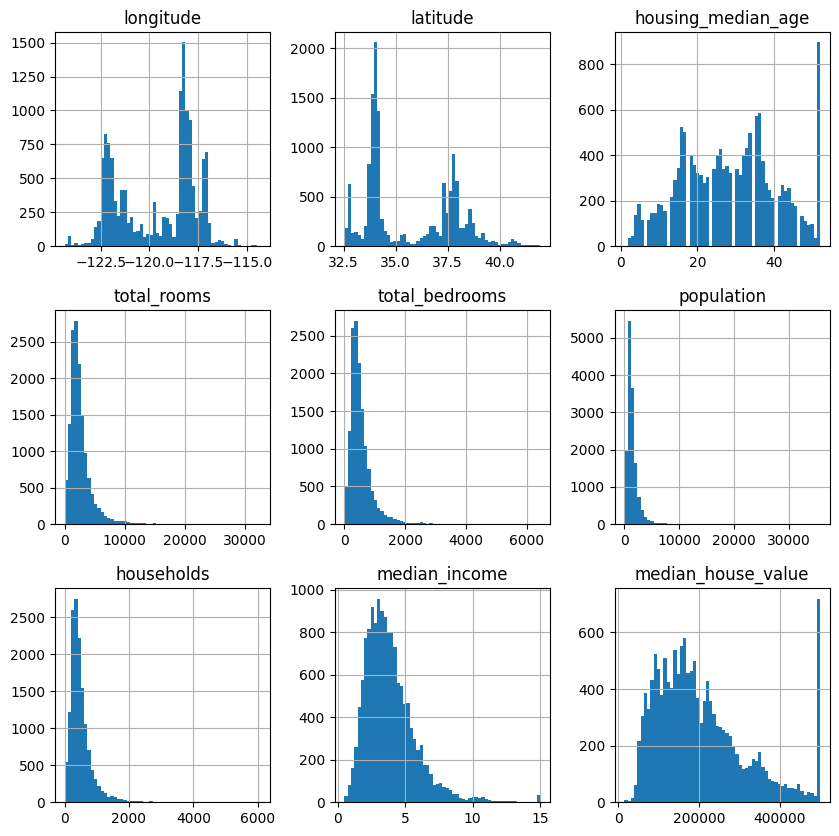

In [10]:
# Membuat histogram untuk setiap kolom dalam DataFrame df
df.hist(bins=60, figsize=(10, 10))

# Menampilkan plot
plt.show()


- dapat terlihat bahwa fitur-fitur yang ada kebanyakan berdistribusi tidak normal. Selain itu, sepintas dapat terlihat pula bahwa terdapat outlier data yang cukup mencolok di kolom housing_median_age dan median_house_value yang nantinya akan didrop. Dalam kasus linear regression, persebaran data yang tidak normal ini dapat mempengaruhi keakuratan model. Oleh karena itu, untuk fitur-fitur yang berdistribusi tidak normal, nantinya akan diubah distribusinya menjadi atau mendekati distribusi normal dengan cara mengubah skalanya menjadi skala logaritmik menggunakan library sklearn, yaitu power transformer. Transformasi Logaritmik: Cocok untuk data dengan skewness positif menurut [sumber](https://ichi.pro/id/mengapa-kami-melakukan-transformasi-log-variabel-dan-interpretasi-logloss-260015329894242?form=MG0AV3)

## **Data Preprocessing**

In [11]:
# Duplikasi data agar tidak mempengaruhi data asli
df_model = df.copy()

### **Cek Data Duplikat**

In [12]:
df_model.duplicated().sum()

np.int64(0)

### **Cek Missing Value**

In [13]:
df_model.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

### **Cek Korelasi**

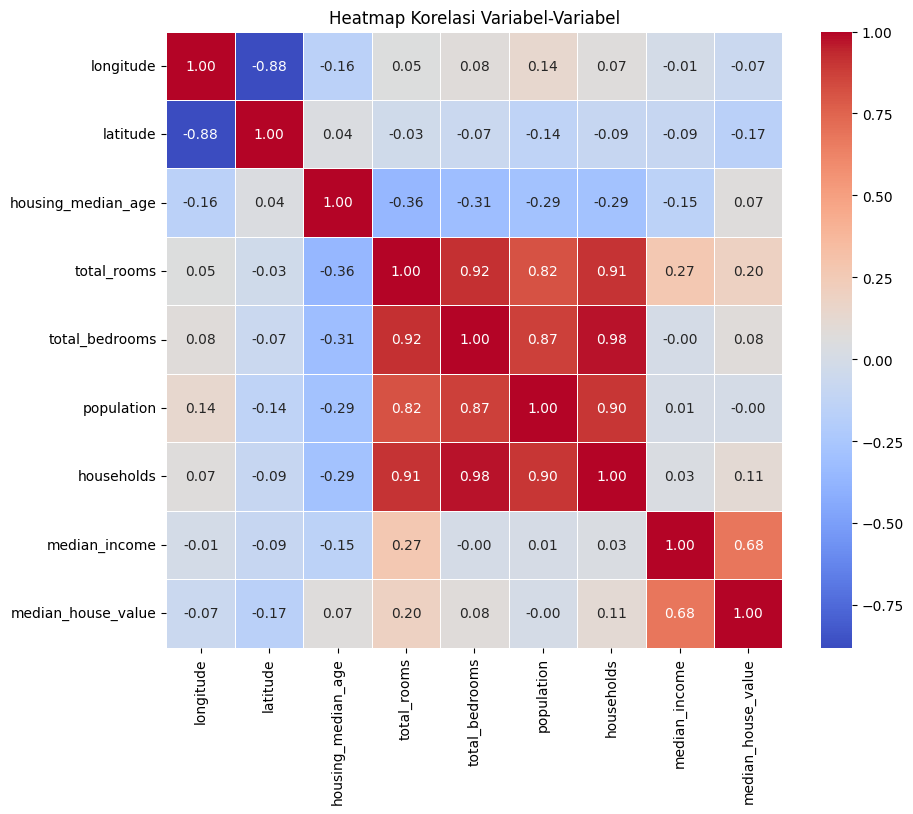

In [14]:
# Memilih hanya kolom numerik
numeric_df = df_model.select_dtypes(include=['float64', 'int64'])
# Menghitung matriks korelasi menggunakan metode Spearman pada df_model
corr_matrix = numeric_df.corr(method='spearman')
# Membuat heatmap dengan anotasi korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, square=True, linewidths=0.5, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap Korelasi Variabel-Variabel')
# Menampilkan plot
plt.show()


Dari analisis korelasi, kita melihat bahwa beberapa fitur sangat berkorelasi. Menghapus fitur yang redundant dapat mengurangi multikolinearitas tanpa kehilangan informasi penting. Karena total rooms dan total bedrooms memiliki korelasi yang sangat tinggi (0.92), salah satu fitur ini bisa dihapus untuk mengurangi multikolinearitas. Misalnya, kita bisa menghapus total bedrooms.

Dari informasi korelasi, kita juga dapat membuat fitur baru yang menggabungkan fitur yang ada untuk menangkap hubungan yang lebih mendetail.

### **Cek Outlier**

<Axes: >

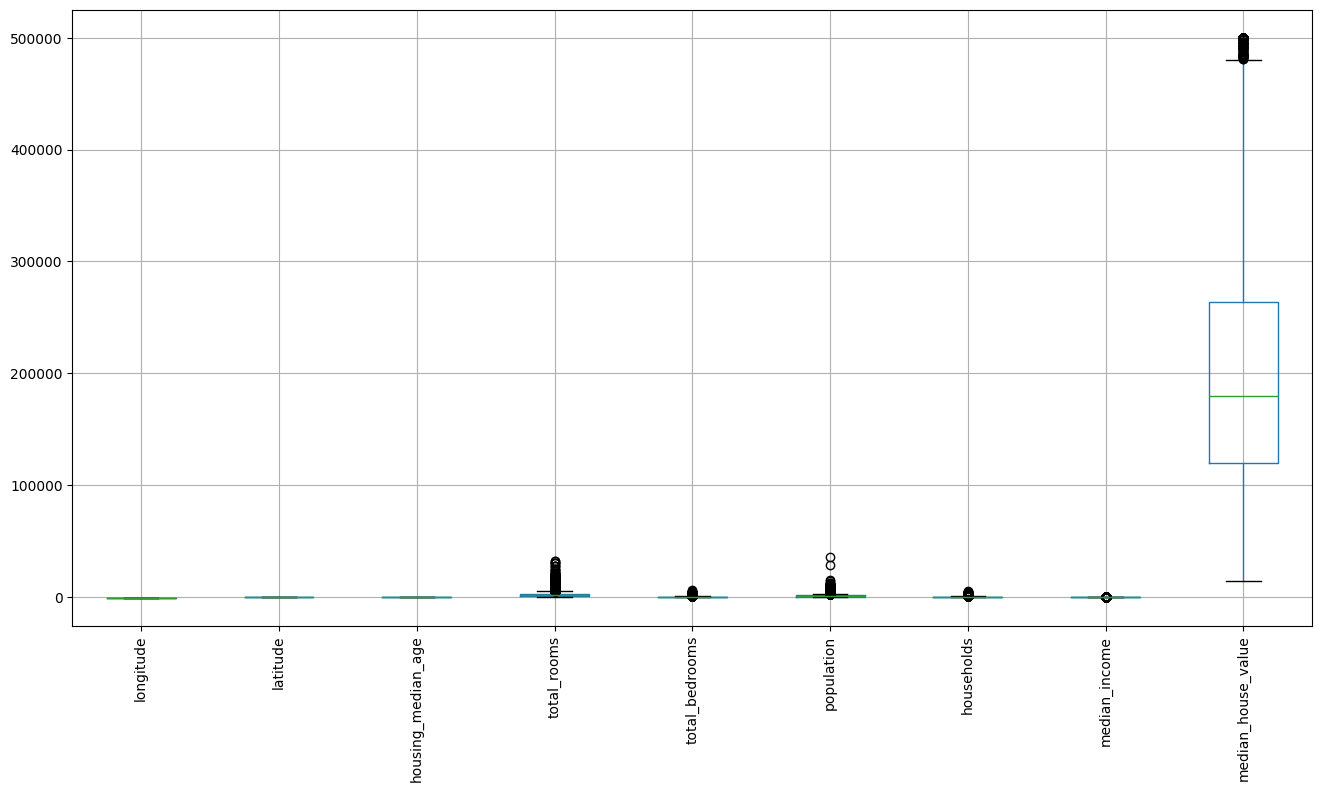

In [15]:
plt.figure(figsize=(16,8))
df.boxplot(rot=90)

terdapat 6 kolom yang mengandung outlier. akan tetapi pada saat kita melakukan EDA, terdapat kolom median house value dan housing median age memiliki outlier yang paling ekstrem. ini akan sensitif (bias) bila tidak dihilangkan.

### **Penanganan Outliers**

- outliers sudah terlihat pada EDA di awal sub-bab. Di mana pada kolom median_house_value dan housing_median_age memiliki nilai ekstrim di ujung kanan plot nya. maka kita akan melakukan drop pada nilai ekstrim tersebut untuk merapikan data.

In [16]:
# Statistik deskriptif untuk kolom 'median_house_value'
pd.DataFrame(df_model['median_house_value'].describe())


,median_house_value
count,14448.000000
mean,206824.624516
std,115365.476182
min,14999.000000
25%,119600.000000
50%,180000.000000
75%,263900.000000
max,500001.000000


In [17]:
# Value counts untuk 'median_house_value' yang lebih besar dari 450000
df_model[df_model['median_house_value'] > 450000]['median_house_value'].value_counts().head()

median_house_value
500001.0    678
500000.0     18
475000.0      7
483300.0      6
470000.0      3
Name: count, dtype: int64

In [18]:
# Menghapus baris dengan median_house_value sebesar 500001.0
df_model = df_model.drop(df_model[df_model['median_house_value'] == 500001.0].index)
df_model

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [19]:
# Statistik deskriptif untuk kolom 'median_house_value' setelah drop
pd.DataFrame(df_model['median_house_value'].describe())

,median_house_value
count,13770.000000
mean,192389.360712
std,97589.825606
min,14999.000000
25%,116700.000000
50%,174000.000000
75%,248000.000000
max,500000.000000


In [20]:
# Statistik deskriptif untuk kolom 'housing_median_age'
pd.DataFrame(df_model['housing_median_age'].describe())


,housing_median_age
count,13770.000000
mean,28.356064
std,12.504354
min,1.000000
25%,18.000000
50%,28.000000
75%,37.000000
max,52.000000


In [21]:
# Value counts untuk 'housing_median_age' yang lebih besar dari 45
df_model[df_model['housing_median_age'] > 45]['housing_median_age'].value_counts().head()

housing_median_age
52.0    770
46.0    170
47.0    126
48.0    106
50.0     87
Name: count, dtype: int64

In [22]:
# Menghapus baris dengan housing_median_age sebesar 52
df_model = df_model.drop(df_model[df_model['housing_median_age'] == 52].index)
df_model

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [23]:
# Statistik deskriptif untuk kolom 'housing_median_age' setelah drop outliers
pd.DataFrame(df_model['housing_median_age'].describe())

,housing_median_age
count,13000.000000
mean,26.955615
std,11.425619
min,1.000000
25%,17.000000
50%,27.000000
75%,36.000000
max,51.000000


### **Penambahan Feature baru**

Menambahkan fitur baru dalam preprocessing data adalah langkah strategis dalam feature engineering yang bertujuan untuk menyediakan informasi tambahan yang mungkin tidak terlihat dari fitur asli. Fitur baru dapat menangkap hubungan yang lebih kompleks antara variabel yang mungkin tidak terdeteksi dengan menggunakan fitur asli saja. Contoh: rooms_per_household memberikan informasi yang lebih terperinci daripada total_rooms atau households secara terpisah Dimana harga rumah sebenarnya lebih ditentukan oleh jumlah ruangan atau kamar per rumah tangga, bukan jumlah kamar perblok.

Manfaat dari menambahkan fitur baru:
- Akurasi yang lebih baik: Menyediakan informasi tambahan dan lebih relevan dapat membantu model untuk membuat prediksi yang lebih akurat.
- Model yang lebih stabil: Mengurangi multikolinearitas dan menangani skewness data membantu model bekerja dengan lebih stabil dan dapat diandalkan.
- Pemahaman yang lebih baik: Fitur baru yang dihasilkan memberikan wawasan tambahan yang dapat meningkatkan pemahaman kita tentang data.


In [24]:
# Fitur baru yang lebih informatif
df_model['rooms_per_household'] = df_model['total_rooms'] / df_model['households']
df_model['bedrooms_per_room'] = df_model['total_bedrooms'] / df_model['total_rooms']
df_model['population_per_household'] = df_model['population'] / df_model['households']

df_model

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,3.671480,0.322517,3.018051
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,6.478022,0.167939,3.810440
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,2.518000,0.474980,3.051000
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,4.622754,0.251295,3.628743
5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0,6.495068,0.153773,2.718249
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0,6.000000,0.174277,3.251142
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0,5.349282,0.174419,3.095694
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0,3.641221,NaN,1.791349
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0,4.540598,0.234353,2.247863


In [25]:
# hanya kolom numerik yang digunakan dalam perhitungan korelasi
df_model_numeric = df_model.select_dtypes(include=[np.number])

# Menghitung korelasi
correlation_matrix = df_model_numeric.corr()

# Mendapatkan korelasi dengan 'median_house_value' dan mengurutkannya
median_house_value_correlation = correlation_matrix['median_house_value'].sort_values(ascending=False)
print(median_house_value_correlation)


median_house_value          1.000000
median_income               0.662881
total_rooms                 0.148295
rooms_per_household         0.115102
households                  0.095777
total_bedrooms              0.076341
population                  0.018212
housing_median_age          0.011614
longitude                  -0.015219
population_per_household   -0.026574
latitude                   -0.177711
bedrooms_per_room          -0.229117
Name: median_house_value, dtype: float64


Bedrooms Per Room (-0.229117): Korelasi negatif ini menunjukkan bahwa lebih banyak kamar tidur per jumlah total kamar cenderung dikaitkan dengan nilai median rumah yang lebih rendah. Ini mungkin menunjukkan bahwa rumah dengan lebih banyak kamar tidur tetapi lebih sedikit ruang total mungkin dianggap kurang menguntungkan.

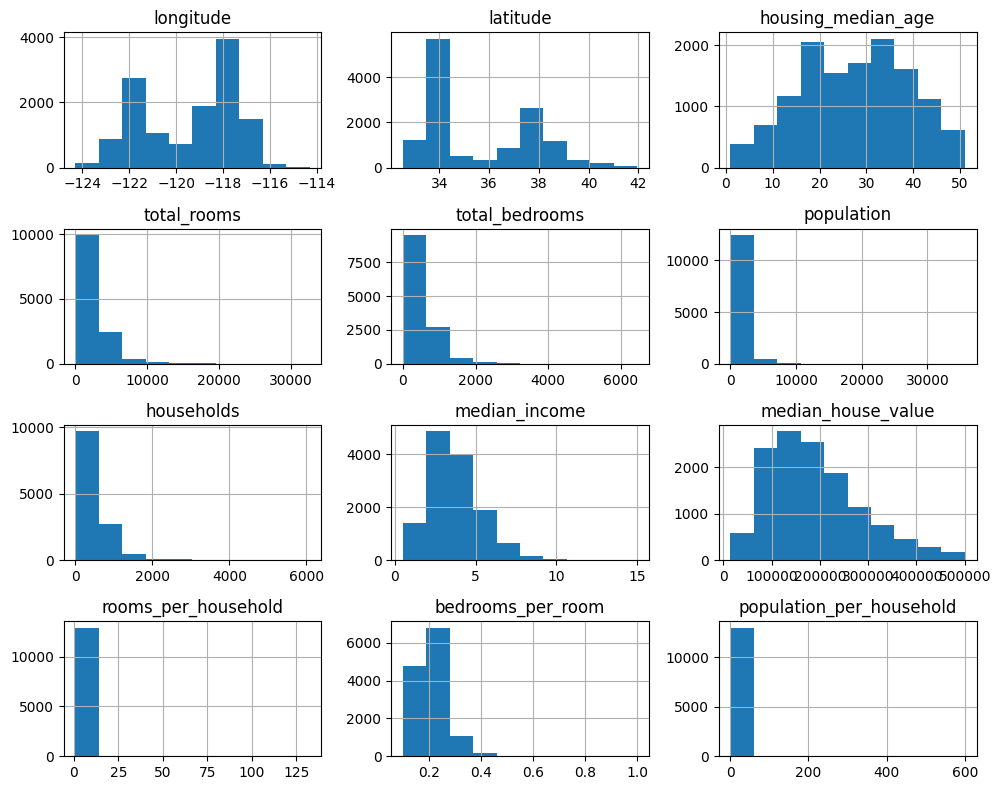

In [26]:
df_model.hist(figsize=(10,8))
plt.tight_layout()

setelah dicek kembali. terlihat juga distribusi dari fitur baru ternyata tidak terdistribusi normal sehingga langkah kita selanjutnya adalah scalling dan transformation pada feature engineering

### **Feature Engineering**

Langkah-langkah yang akan ditempuh sebagai berikut:
1. OneHotEncoding digunakan untuk ocean_proximity, karena ini adalah fitur kategorikal yang dapat dikonversi menjadi fitur numerik biner. memilih onehotencoding untuk mencegah model menganggap ada urutan atau hubungan ordinal antara kategori-kategori tersebut
2. Iterative Imputer digunakan untuk mengisi nilai yang hilang (missing values) pada bedrooms_per_room, Menggunakan model prediktif (seperti regresi) untuk mengestimasi nilai yang hilang sehingga dapat menghasilkan imputasi yang lebih akurat.
3. PowerTransformer (log Scale) digunakan pada berbagai fitur numerik untuk mengurangi skewness dan mendekatkan distribusi data ke distribusi normal, yang dapat meningkatkan kinerja model pembelajaran mesin.

dengan catatan: Passthrough untuk longitude dan latitude, karena fitur ini sudah berada dalam skala yang sesuai dan tidak memerlukan transformasi lebih lanjut.

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

In [28]:
# Menambahkan fitur baru dari perhitungan
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

# OneHotEncoding untuk fitur kategorikal 'ocean_proximity'
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(df[['ocean_proximity']])

# Menambahkan fitur yang di-encode kembali ke DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['ocean_proximity']))
df_model = df.join(encoded_df).drop('ocean_proximity', axis=1)

In [29]:
# Iterative Imputer untuk mengisi missing values pada 'bedrooms_per_room'
imputer = IterativeImputer(random_state=0)
df_model[['bedrooms_per_room']] = imputer.fit_transform(df_model[['bedrooms_per_room']])

In [30]:
# Daftar fitur numerik yang akan ditransformasi
numerical_features = ['housing_median_age', 'total_rooms', 'population',
                      'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room',
                      'population_per_household']

# PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df_model[numerical_features] = pt.fit_transform(df_model[numerical_features])

In [31]:
# Column transformer untuk menggabungkan preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', 'passthrough', encoder.get_feature_names_out(['ocean_proximity'])),
        ('passthrough', 'passthrough', ['longitude', 'latitude'])
    ]
)

# Menerapkan preprocessing ke DataFrame
df_processed = preprocessor.fit_transform(df_model)

#### **Pengurangan Feature**

Berdasarkan gambar hubungan korelasi tadi, ditemukan total rooms dan total bedrooms memiliki korelasi yang sangat tinggi (0.92), salah satu fitur ini bisa dihapus untuk mengurangi multikolinearitas. kita bisa menghapus total bedroom yang kebetulan memiliki missing value.

In [32]:
# Menghapus fitur yang sangat berkorelasi terhadapt fitur independent satu sama lain
df_model.drop(['total_bedrooms'], axis=1, inplace=True)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   14448 non-null  float64
 1   latitude                    14448 non-null  float64
 2   housing_median_age          14448 non-null  float64
 3   total_rooms                 14448 non-null  float64
 4   population                  14448 non-null  float64
 5   households                  14448 non-null  float64
 6   median_income               14448 non-null  float64
 7   median_house_value          14448 non-null  float64
 8   rooms_per_household         14448 non-null  float64
 9   bedrooms_per_room           14448 non-null  float64
 10  population_per_household    14448 non-null  float64
 11  ocean_proximity_INLAND      14448 non-null  float64
 12  ocean_proximity_ISLAND      14448 non-null  float64
 13  ocean_proximity_NEAR BAY    144

#### **Data Splitting**

In [33]:
from sklearn.model_selection import train_test_split

# Pisahkan data menjadi fitur (X) dan target (y)
X = df_model.drop('median_house_value', axis=1)
y = df_model['median_house_value']

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

Dengan selesainya skema preprocessing ini, data siap untuk dimasukkan ke dalam model pembelajaran mesin, seperti regresi linier, Random Forest, dan XGBoost, untuk prediksi yang lebih akurat dan andal.

## **Modeling**

In [34]:
# Import library
from sklearn.model_selection import cross_val_score, KFold,RandomizedSearchCV
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import  r2_score, mean_absolute_error, mean_absolute_percentage_error, make_scorer

### **Pengujian Berbagai macam Modeling**

In [35]:
linreg = LinearRegression()
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor(random_state=2020)
rf = RandomForestRegressor(random_state=2020)
xgb = XGBRegressor(random_state=2020)

In [36]:
# Inisialisasi model
models = {
    'Linear Regression': LinearRegression(),
    'KNN Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=2020),
    'Random Forest': RandomForestRegressor(random_state=2020),
    'XGBoost': XGBRegressor(random_state=2020)
}

# List untuk menyimpan hasil evaluasi
scores_rmse = []
scores_mae = []
scores_mape = []
scores_r2 = []

# Fungsi untuk mengonversi skor negatif menjadi positif
def convert_negative_scores(scores):
    return -scores

# Cross-validation
crossval = 5  # Atur jumlah fold untuk cross-validation

for model_name, model in models.items():
    estimator = model
    score_rmse = cross_val_score(estimator, X_train, y_train, cv=crossval, scoring='neg_root_mean_squared_error')
    score_mae = cross_val_score(estimator, X_train, y_train, cv=crossval, scoring='neg_mean_absolute_error')
    score_mape = cross_val_score(estimator, X_train, y_train, cv=crossval, scoring='neg_mean_absolute_percentage_error')
    score_r2 = cross_val_score(estimator, X_train, y_train, cv=crossval, scoring='r2')
    
    # Mengonversi skor negatif menjadi positif
    score_rmse = convert_negative_scores(score_rmse)
    score_mae = convert_negative_scores(score_mae)
    score_mape = convert_negative_scores(score_mape)
    
    # Menyimpan hasil evaluasi
    scores_rmse.append((model_name, score_rmse.mean(), score_rmse.std()))
    scores_mae.append((model_name, score_mae.mean(), score_mae.std()))
    scores_mape.append((model_name, score_mape.mean(), score_mape.std()))
    scores_r2.append((model_name, score_r2.mean(), score_r2.std()))
    
    # Menampilkan hasil evaluasi untuk setiap model
    print(f"Model: {model_name}")
    print(f"RMSE: Mean = {score_rmse.mean()}, Std = {score_rmse.std()}")
    print(f"MAE: Mean = {score_mae.mean()}, Std = {score_mae.std()}")
    print(f"MAPE: Mean = {score_mape.mean()}, Std = {score_mape.std()}")
    print(f"R-squared: Mean = {score_r2.mean()}, Std = {score_r2.std()}")
    print("---------------------------------------")


Model: Linear Regression
RMSE: Mean = 70083.6705349372, Std = 1997.545262792773
MAE: Mean = 53096.07786183267, Std = 1327.8692425110605
MAPE: Mean = 0.3172525453097836, Std = 0.01057896887461767
R-squared: Mean = 0.6342457122595582, Std = 0.020408690806237435
---------------------------------------
Model: KNN Regressor
RMSE: Mean = 58031.82700924268, Std = 2013.2319980747739
MAE: Mean = 38970.747687185896, Std = 1042.787970809249
MAPE: Mean = 0.20963375063927986, Std = 0.008613937746114398
R-squared: Mean = 0.7492328251380703, Std = 0.015502547968013989
---------------------------------------
Model: Decision Tree
RMSE: Mean = 71724.32854461276, Std = 1707.7081311049037
MAE: Mean = 46352.34368070845, Std = 1109.315398557227
MAPE: Mean = 0.2492430090467063, Std = 0.011552584207169186
R-squared: Mean = 0.6170142241151135, Std = 0.017259597381459237
---------------------------------------
Model: Random Forest
RMSE: Mean = 51260.715170769065, Std = 1273.8513297242368
MAE: Mean = 33901.58559

Jika dibandingkan dengan model lainnya, XGBoost memiliki hasil yang terbaik. XGBoost memiliki nilai paling kecil Dari segi MAE, MAPE (menunjukkan kinerja yang baik). Sedangkan R Squared nya juga menunjukkan hasil tertinggi.


### **Percobaan Modeling dengan Polinomial (degree 2)**

In [37]:
poly_models_degree2 = [
    ('linear_regression_poly', LinearRegression()),
    ('knn_regressor_poly', KNeighborsRegressor()),
    ('decision_tree_poly', DecisionTreeRegressor(random_state=2020)),
    ('random_forest_poly', RandomForestRegressor(random_state=2020)),
    ('xgboost_poly', XGBRegressor(random_state=2020))
]

poly_scores_rmse_degree2 = []
poly_scores_mae_degree2 = []
poly_scores_mape_degree2 = []
poly_scores_r2_degree2 = []

for model_name, model in poly_models_degree2:
    crossval = KFold(n_splits=5, shuffle=True, random_state=2020)
    
    # Cross-validation untuk masing-masing metrik evaluasi
    score_rmse = -cross_val_score(estimator, X_train, y_train, cv=crossval, scoring='neg_root_mean_squared_error')
    score_mae = -cross_val_score(estimator, X_train, y_train, cv=crossval, scoring='neg_mean_absolute_error')
    score_mape = -cross_val_score(estimator, X_train, y_train, cv=crossval, scoring='neg_mean_absolute_percentage_error')
    score_r2 = cross_val_score(estimator, X_train, y_train, cv=crossval, scoring='r2')
    
    # Menyimpan hasil evaluasi
    poly_scores_rmse_degree2.append(score_rmse)
    poly_scores_mae_degree2.append(score_mae)
    poly_scores_mape_degree2.append(score_mape)
    poly_scores_r2_degree2.append(score_r2)

    # Menampilkan hasil evaluasi untuk setiap model
    print(f"Model: {model_name}")
    print(f"RMSE: Mean = {score_rmse.mean()}, Std = {score_rmse.std()}")
    print(f"MAE: Mean = {score_mae.mean()}, Std = {score_mae.std()}")
    print(f"MAPE: Mean = {score_mape.mean()}, Std = {score_mape.std()}")
    print(f"R-squared: Mean = {score_r2.mean()}, Std = {score_r2.std()}")
    print("---------------------------------------")

Model: linear_regression_poly
RMSE: Mean = 49470.51684520141, Std = 1970.9310173479346
MAE: Mean = 32412.643287415693, Std = 1167.6014165467293
MAPE: Mean = 0.17905382125505037, Std = 0.005066893613313298
R-squared: Mean = 0.8176045801366183, Std = 0.009967753554762015
---------------------------------------
Model: knn_regressor_poly
RMSE: Mean = 49470.51684520141, Std = 1970.9310173479346
MAE: Mean = 32412.643287415693, Std = 1167.6014165467293
MAPE: Mean = 0.17905382125505037, Std = 0.005066893613313298
R-squared: Mean = 0.8176045801366183, Std = 0.009967753554762015
---------------------------------------
Model: decision_tree_poly
RMSE: Mean = 49470.51684520141, Std = 1970.9310173479346
MAE: Mean = 32412.643287415693, Std = 1167.6014165467293
MAPE: Mean = 0.17905382125505037, Std = 0.005066893613313298
R-squared: Mean = 0.8176045801366183, Std = 0.009967753554762015
---------------------------------------
Model: random_forest_poly
RMSE: Mean = 49470.51684520141, Std = 1970.931017347

| Model               | MAPE Biasa (Mean ± Std)     | MAPE Polynomial (Mean ± Std)    |
|---------------------|-----------------------------|---------------------------------|
| XGBoost             | 0.1788 ± 0.0063             | 0.1791 ± 0.0051                 |

Setelah dilakukan pemodelan dengan polynomial, ternyata hasilnya tidak mengalami perbaikan sehingga hal ini tidak perlu kita tinjau karena Penambahan fitur polinomial dapat meningkatkan kompleksitas model dengan menambahkan lebih banyak fitur dan tidak selalu meningkatkan kinerja. Dalam kasus ini, kompleksitas tambahan dari fitur polinomial tidak memberikan manfaat berarti dalam hal pengurangan kesalahan.

### **Pelatihan-Pengujian Model Pilihan Terbaik (XGBoost)**

In [38]:
# Latih model XGBoost terbaik dengan seluruh data pelatihan
best_model = XGBRegressor(random_state=2020)
best_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=2020, ...)

In [39]:
# Prediksi pada data pengujian
y_pred = best_model.predict(X_test)

# Hitung metrik evaluasi
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test))
r2_test = r2_score(y_test, y_pred)

print(f"Test RMSE: {np.sqrt(mse_test)}")
print(f"Test MAE: {mae_test}")
print(f"Test MAPE: {mape_test}")
print(f"Test R²: {r2_test}")


Test RMSE: 48815.360098161895
Test MAE: 32354.389177840254
Test MAPE: 0.17920573723280442
Test R²: 0.8164943379769766


| Metric             | Data Train             | Data Test                |
|--------------------|-------------------------------------|--------------------------|
| MAPE               | 0.1788                      | 0.1792                   |
| R-squared          | 0.8224                     | 0.8165                   |

Hasil evaluasi menunjukkan Performa model pada data pengujian sangat mirip dengan performa pada data pelatihan, Meskipun ada sedikit penurunan dalam R² dan peningkatan kecil dalam MAE dan MAPE pada data pengujian, hal ini diharapkan dan menunjukkan bahwa model memiliki kemampuan generalisasi yang baik tanpa tanda-tanda signifikan overfitting atau underfitting.

### **Tuning Hyperparameter**

Pada Tuning kali ini menggunakan Random-Search dengan pertimbangan untuk mempersingkat waktu pemrosesan

In [40]:
from scipy.stats import uniform, randint

# Definisikan ruang hyperparameter untuk pencarian acak
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 5),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.8, 1.0)
}

# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=XGBRegressor(random_state=2020), param_distributions=param_dist,
                                   n_iter=100, cv=3, random_state=2020, n_jobs=-1, verbose=2)

# Latih model dengan RandomizedSearchCV
random_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
print(f'Best Parameters: {random_search.best_params_}')

# Latih model dengan parameter terbaik
best_model_random = random_search.best_estimator_

# Prediksi pada data pengujian
y_pred_random = best_model_random.predict(X_test)

# Hitung metrik evaluasi
mse_test_random = mean_squared_error(y_test, y_pred_random)
mae_test_random = mean_absolute_error(y_test, y_pred_random)
mape_test_random = np.mean(np.abs((y_test - y_pred_random) / y_test))
r2_test_random = r2_score(y_test, y_pred_random)

print(f"Test RMSE (RandomizedSearch): {np.sqrt(mse_test_random)}")
print(f"Test MAE (RandomizedSearch): {mae_test_random}")
print(f"Test MAPE (RandomizedSearch): {mape_test_random}")
print(f"Test R² (RandomizedSearch): {r2_test_random}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'learning_rate': np.float64(0.1114069691027229), 'max_depth': 4, 'n_estimators': 282, 'subsample': np.float64(0.9382133458311578)}
Test RMSE (RandomizedSearch): 47899.80365376014
Test MAE (RandomizedSearch): 32128.262897608492
Test MAPE (RandomizedSearch): 0.17867179881535333
Test R² (RandomizedSearch): 0.82331326699297


| Metrik         | Sebelum Tuning | Setelah Tuning |
|----------------|----------------|----------------|
| **RMSE**       | 48,815.36      | 47,899.80      |
| **MAE**        | 32,354.39      | 32,128.26      |
| **MAPE**       | 0.1792         | 0.1787         |
| **R-squared**  | 0.8165         | 0.8233         |

Hasil evaluasi menunjukkan bahwa model XGBoost setelah penerapan Randomized Search untuk tuning hyperparameter memiliki performa yang lebih baik dibandingkan dengan model sebelum tuning. di mana:
- RMSE menurun dari 48815.36 menjadi 47899.80.
- MAE menurun dari 32354.39 menjadi 32128.26.
- MAPE sedikit menurun dari 0.1792 menjadi 0.1787.
- Peningkatan R² meningkat dari 0.8165 menjadi 0.8233.
Peningkatan R² menunjukkan bahwa model dengan hyperparameter yang disetel melalui Randomized Search lebih baik dalam menjelaskan variasi data. 

### **Pelatihan & Pengujian XGboost setelah Tuning**

In [41]:
# Latih model XGBoost terbaik dengan seluruh data pelatihan
best_model = XGBRegressor(random_state=2020, **random_search.best_params_)
best_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None,
             learning_rate=np.float64(0.1114069691027229), max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=282, n_jobs=None,
             num_parallel_tree=None, random_state=2020, ...)

In [42]:
# Prediksi pada data pengujian
y_pred = best_model.predict(X_test)

# Hitung metrik evaluasi
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test))
r2_test = r2_score(y_test, y_pred)

print(f"Test RMSE: {np.sqrt(mse_test)}")
print(f"Test MAE: {mae_test}")
print(f"Test MAPE: {mape_test}")
print(f"Test R²: {r2_test}")

Test RMSE: 47899.80365376014
Test MAE: 32128.262897608492
Test MAPE: 0.17867179881535333
Test R²: 0.82331326699297


Menurut literatur, MAPE kurang dari 10% dianggap sangat baik, 10%-20% baik, 20%-50% wajar, dan lebih dari 50% dianggap tidak akurat. (Sumber: Makridakis, Wheelwright, and Hyndman, "Forecasting: Methods and Applications").

### **Kurva Training - Validation Score**
untuk mengetahui performa model berdasarkan score kemampuannya pada data training dan data test.

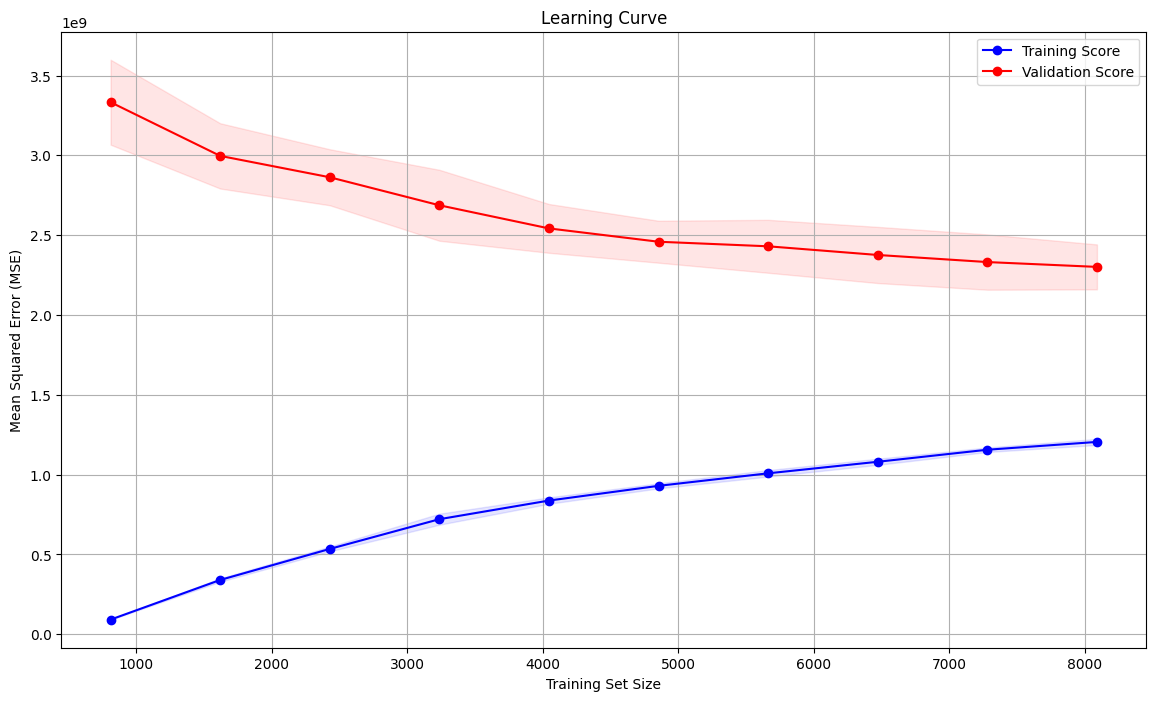

In [43]:
from sklearn.model_selection import learning_curve

# Generate data untuk kurva pembelajaran
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

# Hitung rata-rata dan standar deviasi untuk skor pelatihan dan pengujian
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot kurva pembelajaran
plt.figure(figsize=(14, 8))
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid()

# Plot skor pelatihan
plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="b")

# Plot skor pengujian
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Validation Score")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="r")

# Tambahkan legenda
plt.legend(loc="best")
plt.show()

- Training Score (Garis Biru): Skor pelatihan meningkat seiring bertambahnya ukuran set pelatihan. Ini diharapkan karena semakin banyak data yang digunakan untuk pelatihan, model memiliki lebih banyak kompleksitas untuk diatasi, dan kesalahan cenderung meningkat.

- Validation Score (Garis Merah): Skor validasi menurun seiring bertambahnya ukuran set pelatihan. Ini adalah indikator positif karena menunjukkan bahwa model meningkatkan kemampuan generalisasinya dengan lebih banyak data pelatihan.

### **Plot Actual Vs Prediction Price**

untuk mengetahui performa prediksi model dengan menampilkan sebaran titik actual vs prediction

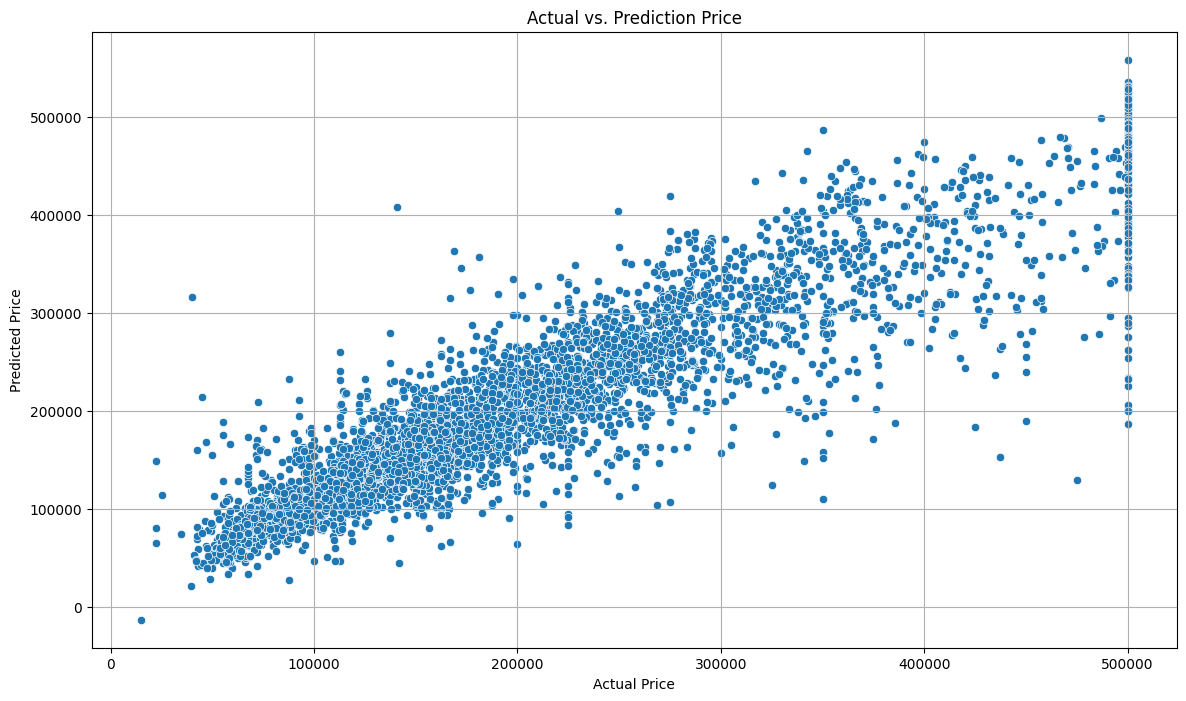

In [44]:
# Membuat scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs. Prediction Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()


Grafik ini menunjukkan bahwa model memiliki performa yang cukup baik dengan korelasi positif kuat antara harga aktual dan harga prediksi. Kebanyakan prediksi mendekati nilai aktual, yang menunjukkan kemampuan model dalam memprediksi harga rumah dengan akurasi yang tinggi.

Vertical Line: Adanya garis vertikal konsentrasi data poin di tepi kanan plot menunjukkan bahwa model memiliki kecenderungan untuk salah memprediksi harga sekitar 500,000 meskipun harga aktual sangat bervariasi. Juga terlihat bahwa semakin ke kanan (nilai harga semakin tinggi) data poin terlihat semakin menyebar keluar garis linier. Ini bisa menjadi indikasi bahwa model terbatas dalam menangkap variasi dalam data yang lebih tinggi.

In [45]:
# Feature importance
importances = best_model.feature_importances_
features = X.columns
feature_importances = pd.DataFrame(importances, index=features, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(feature_importances)

                            Importance
ocean_proximity_INLAND        0.440673
median_income                 0.270799
population_per_household      0.068652
ocean_proximity_NEAR OCEAN    0.049456
housing_median_age            0.033382
longitude                     0.030272
latitude                      0.028091
ocean_proximity_NEAR BAY      0.027275
bedrooms_per_room             0.012794
rooms_per_household           0.012647
households                    0.008884
total_rooms                   0.008830
population                    0.008245
ocean_proximity_ISLAND        0.000000


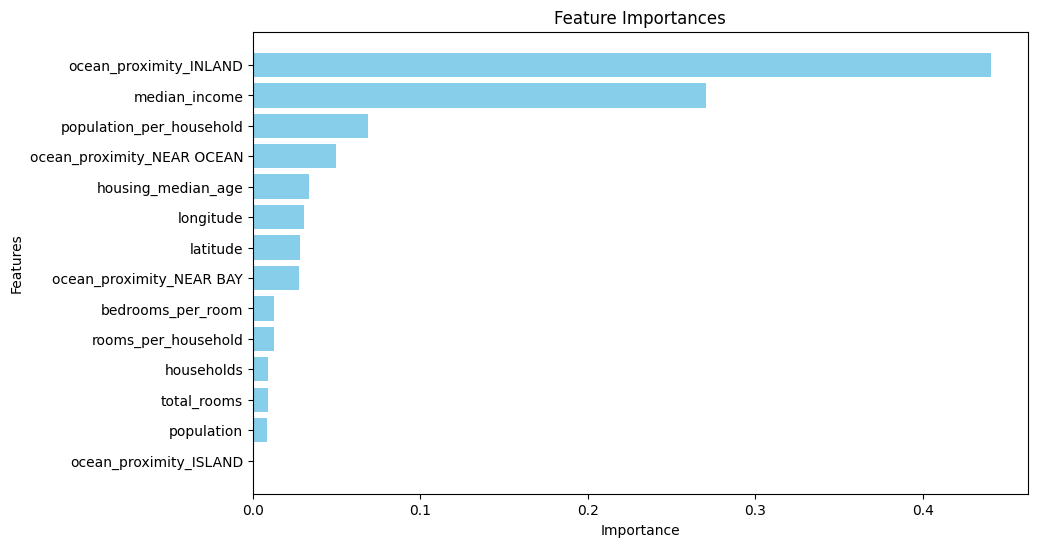

In [46]:
# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


Terlihat bahwa fitur ocean proximity dan median income masih menduduki peringkat teratas sebagai feature yang paling mempengaruhi median harga rumah. Ini wajar karena saat ini juga letak geografis rumah masih menjadi penentu harga. semakin strategis letak rumah maka akan semakin mahal harganya. dalam kasus ini, rumah yang berada di dekat laut yang dikatakan letaknya strategis.

### **Limitasi Model**

Dari hasil pelatihan-pengujian model akhir yang telah dipilih (XGBoost tuned), dapat dilihat bahwa ternyata model memiliki batasan di mana **model kurang baik dalam memprediksi data yang memiliki harga tinggi**. Ini dikarenakan oleh: 
1. Distribusi data pada harga tinggi tidak merata, membuat model kesulitan untuk mempelajari pola pada rentan harga sekitar 400.000 ke atas. Ditambah lagi dengan adanya penghilangan data outliers yang ekstrim yang terletak di harga 500.000 ke atas, di mana penghilangan outlier ini dilakukan demi menjaga agar data representatif dan stabil, dengan pertimbangan mencegah Model bekerja dengan terlalu menyesuaikan ke data outliers yang mengakibatkan model tersebut menjadi overfitted.
2. Complexity of High-Value Properties: Properti dengan harga tinggi biasanya memiliki karakteristik yang lebih kompleks (misalnya fasilitas mewah, luas rumah) yang dalam kasus ini kita tidak mempunyai fitur-fitur tersebut.

    Pada bab rekomendasi nantinya akan dijelaskan untuk mengatasi limitasi ini.

## **Kesimpulan**

- **Model terbaik adalah XGBoost** Ini dikarenakan cara kerjanya yang melibatkan pembuatan pohon keputusan secara bertahap, di mana setiap pohon baru berusaha memperbaiki kesalahan dari pohon sebelumnya. Selain itu, XGBoost menggunakan gradient descent untuk meminimalkan kesalahan secara iteratif dan regularisasi untuk mencegah overfitting. Dengan pendekatan ini, XGBoost mampu menangkap kompleksitas data dan menghasilkan prediksi yang akurat.

- Setelah melatih model XGBoost dengan fitur polinomial (Degree=2), tidak ada terjadinya peningkatan performa, maka polinomial tidak dilanjutkan. XGBoost setelah tuning merupakan model dengan performa paling baik dengan hasil evaluasi metrik sebagai berikut:

    | Metric | RMSE               | MAE                | **MAPE**             | R²               |
    |--------|--------------------|--------------------|------------------|------------------|
    | Value  | 47899.80365376014  | 32128.262897608492 | **0.17867179881535333** | 0.82331326699297 |

    ***...***
- **Metrik Evaluasi**: Jika kita melihat berdasarkan nilai RMSE, didapati nilai RMSE cukup tinggi. Hal ini dikarenakan metrik RMSE memiliki beberapa kelemahan: RMSE tergantung oleh skala data, jadi semakin besar skala, maka nilai RMSE-nya juga besar menurut [sumber](https://www.aporia.com/learn/root-mean-square-error-rmse-the-cornerstone-for-evaluating-regression-models/?form=MG0AV3). RMSE juga dipengaruhi oleh outlier, semakin banyak outlier maka RMSE juga bisa semakin besar. Seperti yang kita ketahui, data kita memiliki outlier yang cukup banyak, tapi jika outliernya dihilangkan maka kita akan kehilangan informasi yang banyak pula. Oleh karena itu, pada kasus ini saya lebih melihat hasil pemodelan menggunakan metrik MAPE yang tidak terlalu sensitif terhadap adanya outlier, di mana hasil dari metrik MAPE sendiri sebesar 17% yang artinya persen kesalahan hasil prediksi data dibanding data aktual hanya sekitar 17%. Selain itu, nilai MAPE 17% termasuk dalam kategori 'Good Forecast' atau model peramalan yang baik menurut [sumber](https://dqlab.id/kriteria-jenis-teknik-analisis-data-dalam-forecasting?form=MG0AV3).

- **Feature Importance**: Berdasarkan pemodelan yang sudah dilakukan, fitur **'ocean_proximity'** dan **'median_income'** menjadi fitur yang paling berpengaruh terhadap **'median_house_value'**. Hal ini cukup wajar artinya kita dapat mengkonfirmasi bahwa lokasi ternyata masih menjadi predictor yang paling kuat dalam menentukan harga suatu rumah. Semakin rumah tersebut berada dalam area atau kawasan yang elit, tentu saja harganya akan tinggi dan sebaliknya. Dalam kasus ini, rumah yang berada di kawasan pinggir dengan pemandangan laut merupakan rumah yang paling mahal dibandingkan dengan rumah yang berada di lokasi lainnya.
Hal ini juga berbanding lurus dengan fitur 'median_income', di mana rata-rata penghasilan seseorang dalam suatu area akan menentukan harga rumah di sekitarnya. Semakin besar rata-rata penghasilan seseorang di area tersebut, maka akan semakin mahal harga rumahnya, begitu pula sebaliknya.

- **Limitasi Model**: pada grafik prediction vs actual size, model memiliki kecenderungan untuk salah memprediksi harga di 400.000 ke atas. Ini bisa menjadi indikasi bahwa **model mungkin terbatas dalam menangkap variasi dalam data yang lebih tinggi**.





## **Rekomendasi**

- **Penambahan Fitur Relevan**:
Tambahkan fitur seperti **luas rumah, fasilitas rumah, dan perusahaan pengembang** untuk meningkatkan akurasi prediksi harga rumah.

- **Pembaruan Data**:
Perbarui data yang digunakan, karena data saat ini dari tahun 1990 sudah tidak relevan akibat **inflasi dan perubahan kondisi pasar**.

- **Hyperparameter Tuning**:
**Gunakan metode grid search** untuk hyperparameter tuning yang lebih baik dibandingkan randomized search yang hanya memilih kombinasi secara acak.

- **Penggunaan Model**:
Model dapat digunakan untuk prediksi harga rumah yang memiliki fitur serupa dengan dataset California house. Model menunjukkan performa stabil dan tidak overfitting atau underfitting.

## **Save Model**
- file model terbaik akan disimpan dengan metode pickle.dump

In [47]:
import pickle

# Simpan model yang telah di-tuning ke file
pickle.dump(best_model, open('tuned_xgb_model.sav', 'wb'))

- file model yang telah disimpan dapat dimuat kembali dengan pickle.load seperti di bawah ini:

In [48]:
# Load model dari file
loaded_model = pickle.load(open('tuned_xgb_model.sav', 'rb'))

# Prediksi menggunakan model yang dimuat
y_pred = loaded_model.predict(X_test)

# Hitung metrik evaluasi
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test))
r2_test = r2_score(y_test, y_pred)

print(f"Test RMSE: {np.sqrt(mse_test)}")
print(f"Test MAE: {mae_test}")
print(f"Test MAPE: {mape_test}")
print(f"Test R²: {r2_test}")


Test RMSE: 47899.80365376014
Test MAE: 32128.262897608492
Test MAPE: 0.17867179881535333
Test R²: 0.82331326699297
